<a href="https://colab.research.google.com/github/dhanushbiligiri/Comparison-of-classification-models/blob/master/AdvanedDatamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
from sklearn.model_selection import GridSearchCV

In [ ]:
#dataset can be found at kaggle https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv
#data = pd.read_csv('/content/drive/MyDrive/data/emails.csv', encoding='ISO-8859-1')
data=pd.read_csv('emails.csv')
data.dropna()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
data.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [ ]:
print(data.isnull().sum())

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


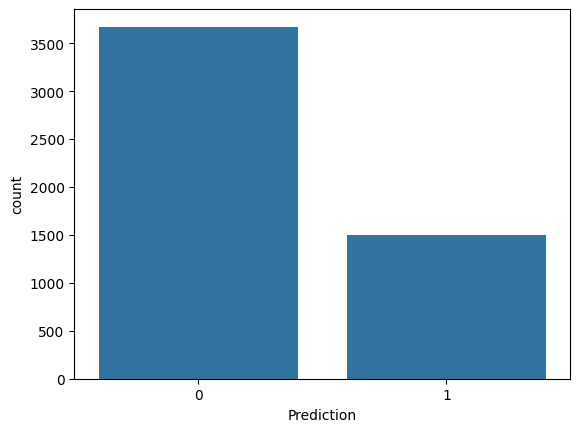

In [ ]:
sns.countplot(data=data, x='Prediction', color=sns.color_palette()[0])

plt.show();

In [ ]:
nltk.download('stopwords')
stopword = data.columns.isin(stopwords.words('english'))
data.columns[stopword]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Index(['the', 'to', 'and', 'for', 'of', 'a', 'you', 'in', 'on', 'is',
       ...
       'nor', 'myself', 'isn', 'haven', 'whom', 'couldn', 'wasn', 'itself',
       'ma', 'aren'],
      dtype='object', length=134)

In [ ]:
stemmer = PorterStemmer()
def stem_words(column):
    stemmed_column = [stemmer.stem(word) for word in column]
    return stemmed_column

In [ ]:
no_stop_words = data.loc[:, ~stopword].copy()
no_stop_words.drop(columns="Email No.", inplace=True)
no_stop_words.shape

(5172, 2867)

In [ ]:
no_stop_words = no_stop_words.astype(str)
stemmed_data = no_stop_words.apply(stem_words)
print(stemmed_data)

     ect hou enron com gas deal meter hpl please    e  ... connevey jay  \
0      1   0     0   0   0    0     0   0      0    4  ...        0   0   
1     24  27     1   3   1    0     0   0      2  141  ...        0   0   
2      1   0     0   0   2    0     0   0      0    3  ...        0   0   
3     22  10     0   0   0    2     1   0      0   79  ...        0   0   
4     17   9     0   0   2    0     3   0      1   71  ...        0   0   
...   ..  ..   ...  ..  ..  ...   ...  ..    ...  ...  ...      ...  ..   
5167   2   0     0   0   0    0     0   0      0   29  ...        0   0   
5168  11   3     1   3   5    0     0   0      1  218  ...        0   0   
5169   1   0     0   0   0    0     0   0      0   12  ...        0   0   
5170   1   0     0   4   0    1     0   0      1   45  ...        0   0   
5171   5   2     1   1   5    0     0   0      1  191  ...        0   0   

     valued lay infrastructure military allowing ff dry Prediction  
0         0   0              0

In [ ]:
stemmed_data

,ect,hou,enron,com,gas,deal,meter,hpl,please,e,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,24,27,1,3,1,0,0,0,2,141,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,2,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,22,10,0,0,0,2,1,0,0,79,...,0,0,0,0,0,0,0,0,0,0
4,17,9,0,0,2,0,3,0,1,71,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,0,0,0,0,0,0,0,0,29,...,0,0,0,0,0,0,0,0,0,0
5168,11,3,1,3,5,0,0,0,1,218,...,0,0,0,0,0,0,0,1,0,0
5169,1,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,1
5170,1,0,0,4,0,1,0,0,1,45,...,0,0,0,0,0,0,0,1,0,1


In [ ]:
# split the dataset into features (X) and labels (y)
X = no_stop_words.drop(columns="Prediction")
y = no_stop_words['Prediction']

In [ ]:
# normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# use PCA to reduce the number of features
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# use RFE to recursively eliminate less important features
lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=100)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
rfe_ranking = rfe.ranking_

In [ ]:
# feature extraction using chi-squared test
kbest = SelectKBest(chi2, k=100)
X_train_chi2 = kbest.fit_transform(X_train, y_train)
X_test_chi2 = kbest.transform(X_test)


In [ ]:
# scale the features
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
X_train_rfe = scaler.fit_transform(X_train_rfe)
X_test_rfe = scaler.transform(X_test_rfe)
X_train_chi2 = scaler.fit_transform(X_train_chi2)
X_test_chi2 = scaler.transform(X_test_chi2)

In [ ]:
# evaluate different classification methods
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

pca_acc=[]
rfe_acc=[]
chi2_acc=[]
for name, model in models.items():
    print(f'--- {name} ---')
    
    # using PCA
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    acc_pca = accuracy_score(y_test, y_pred_pca)
    print(f'Accuracy using PCA: {acc_pca}')
    print(f'Classification report using PCA:\n{classification_report(y_test, y_pred_pca)}')
    print(f'Confusion matrix using PCA:\n{confusion_matrix(y_test, y_pred_pca)}')
    pca_acc.append(acc_pca)
    
    # using RFE
    model.fit(X_train_rfe, y_train)
    y_pred_rfe = model.predict(X_test_rfe)
    acc_rfe = accuracy_score(y_test, y_pred_rfe)
    print(f'Accuracy using RFE: {acc_rfe}')
    print(f'Classification report using RFE:\n{classification_report(y_test, y_pred_rfe)}')
    print(f'Confusion matrix using RFE:\n{confusion_matrix(y_test, y_pred_rfe)}')
    rfe_acc.append(acc_rfe)
    
    # using chi-squared test
    model.fit(X_train_chi2, y_train)
    y_pred_chi2 = model.predict(X_test_chi2)
    acc_chi2 = accuracy_score(y_test, y_pred_chi2)
    print(f'Accuracy using chi-squared test: {acc_chi2}')
    print(f'Classification report using chi-squared test:\n{classification_report(y_test, y_pred_chi2)}')
    print(f'Confusion matrix using chi-squared test:\n{confusion_matrix(y_test, y_pred_chi2)}')
    chi2_acc.append(acc_chi2)

    print('\n')




--- Naive Bayes ---
Accuracy using PCA: 0.7140096618357488
Classification report using PCA:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       739
           1       0.00      0.00      0.00       296

    accuracy                           0.71      1035
   macro avg       0.36      0.50      0.42      1035
weighted avg       0.51      0.71      0.59      1035

Confusion matrix using PCA:
[[739   0]
 [296   0]]
Accuracy using RFE: 0.8888888888888888


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report using RFE:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       739
           1       0.94      0.66      0.77       296

    accuracy                           0.89      1035
   macro avg       0.91      0.82      0.85      1035
weighted avg       0.89      0.89      0.88      1035

Confusion matrix using RFE:
[[726  13]
 [102 194]]
Accuracy using chi-squared test: 0.8473429951690822
Classification report using chi-squared test:
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       739
           1       0.94      0.50      0.65       296

    accuracy                           0.85      1035
   macro avg       0.89      0.74      0.78      1035
weighted avg       0.86      0.85      0.83      1035

Confusion matrix using chi-squared test:
[[730   9]
 [149 147]]


--- Random Forest ---
Accuracy using PCA: 0.9603864734299516
Classification report using PCA:
    

In [ ]:
# calculate the maximum accuracy score and its corresponding feature selection method and classification model
max_acc_pca = max(zip(pca_acc, models.keys()))
max_acc_rfe = max(zip(rfe_acc, models.keys()))
max_acc_chi2 = max(zip(chi2_acc, models.keys()))



# print out the maximum accuracy score and its corresponding feature selection method and classification model
print(f'Best accuracy using PCA: {max_acc_pca[0]} with {max_acc_pca[1]}')
print(f'Best accuracy using RFE: {max_acc_rfe[0]} with {max_acc_rfe[1]}')
print(f'Best accuracy using chi-squared test: {max_acc_chi2[0]} with {max_acc_chi2[1]}')


Best accuracy using PCA: 0.9603864734299516 with Random Forest
Best accuracy using RFE: 0.970048309178744 with Random Forest
Best accuracy using chi-squared test: 0.9207729468599034 with Random Forest


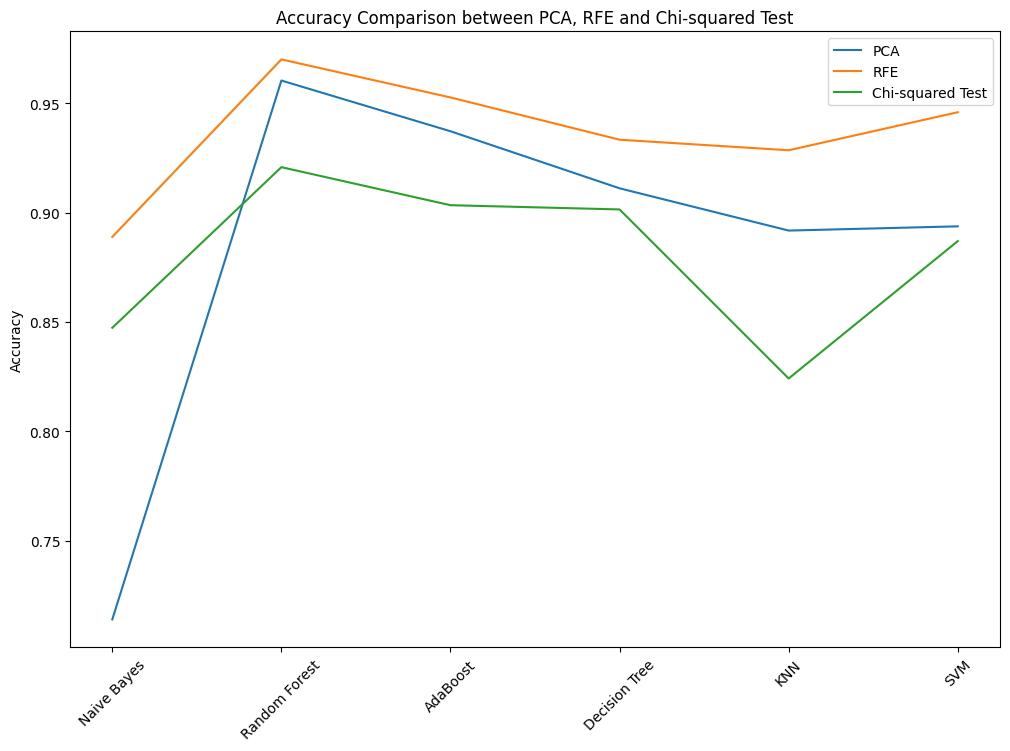

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(models.keys(), pca_acc, label='PCA')
plt.plot(models.keys(), rfe_acc, label='RFE')
plt.plot(models.keys(), chi2_acc, label='Chi-squared Test')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between PCA, RFE and Chi-squared Test')
plt.legend()
plt.show()

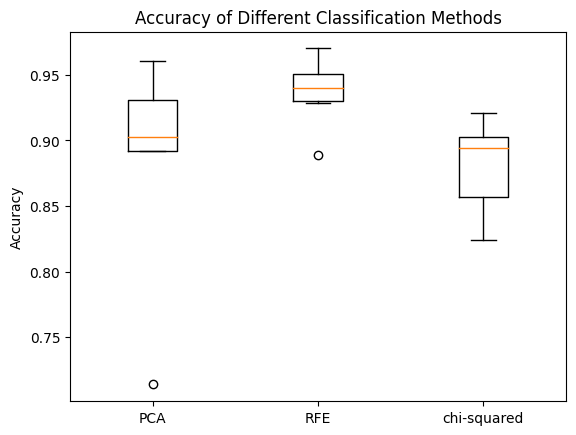

In [ ]:
#Boxplots to understand the distribution of the accuracies of classification models under different feature selections

data = [pca_acc, rfe_acc, chi2_acc]
labels = ['PCA', 'RFE', 'chi-squared']
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(labels)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Different Classification Methods')
plt.show()

In [ ]:
print(np.unique(y_test))
print(np.unique(y_pred_pca))

['0' '1']
['0' '1']


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

results = {}

for name, model in models.items():
    # using PCA
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict(X_test_pca)
    precision_pca, recall_pca, f1_pca, supp_pca = precision_recall_fscore_support(y_test, y_pred_pca, average='binary', pos_label='1')
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    results[name + '_pca'] = {'accuracy': accuracy_pca, 'precision': precision_pca, 'recall': recall_pca, 'f1_score': f1_pca}

    # using RFE
    model.fit(X_train_rfe, y_train)
    y_pred_rfe = model.predict(X_test_rfe)
    precision_rfe, recall_rfe, f1_rfe, supp_rfe = precision_recall_fscore_support(y_test, y_pred_rfe, average='binary', pos_label='1')
    accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
    results[name + '_rfe'] = {'accuracy': accuracy_rfe, 'precision': precision_rfe, 'recall': recall_rfe, 'f1_score': f1_rfe}

    # using chi-squared test
    model.fit(X_train_chi2, y_train)
    y_pred_chi2 = model.predict(X_test_chi2)
    precision_chi2, recall_chi2, f1_chi2, supp_chi2 = precision_recall_fscore_support(y_test, y_pred_chi2, average='binary', pos_label='1')
    accuracy_chi2 = accuracy_score(y_test, y_pred_chi2)
    results[name + '_chi2'] = {'accuracy': accuracy_chi2, 'precision': precision_chi2, 'recall': recall_chi2, 'f1_score': f1_chi2}


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
results

{'Naive Bayes_pca': {'accuracy': 0.7140096618357488,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 'Naive Bayes_rfe': {'accuracy': 0.8888888888888888,
  'precision': 0.9371980676328503,
  'recall': 0.6554054054054054,
  'f1_score': 0.7713717693836978},
 'Naive Bayes_chi2': {'accuracy': 0.8473429951690822,
  'precision': 0.9423076923076923,
  'recall': 0.4966216216216216,
  'f1_score': 0.6504424778761061},
 'Random Forest_pca': {'accuracy': 0.9642512077294686,
  'precision': 0.9575971731448764,
  'recall': 0.9155405405405406,
  'f1_score': 0.9360967184801383},
 'Random Forest_rfe': {'accuracy': 0.970048309178744,
  'precision': 0.9206349206349206,
  'recall': 0.9797297297297297,
  'f1_score': 0.9492635024549918},
 'Random Forest_chi2': {'accuracy': 0.9207729468599034,
  'precision': 0.9349593495934959,
  'recall': 0.777027027027027,
  'f1_score': 0.8487084870848709},
 'AdaBoost_pca': {'accuracy': 0.9371980676328503,
  'precision': 0.9052631578947369,
  'recall': 0.8716216216

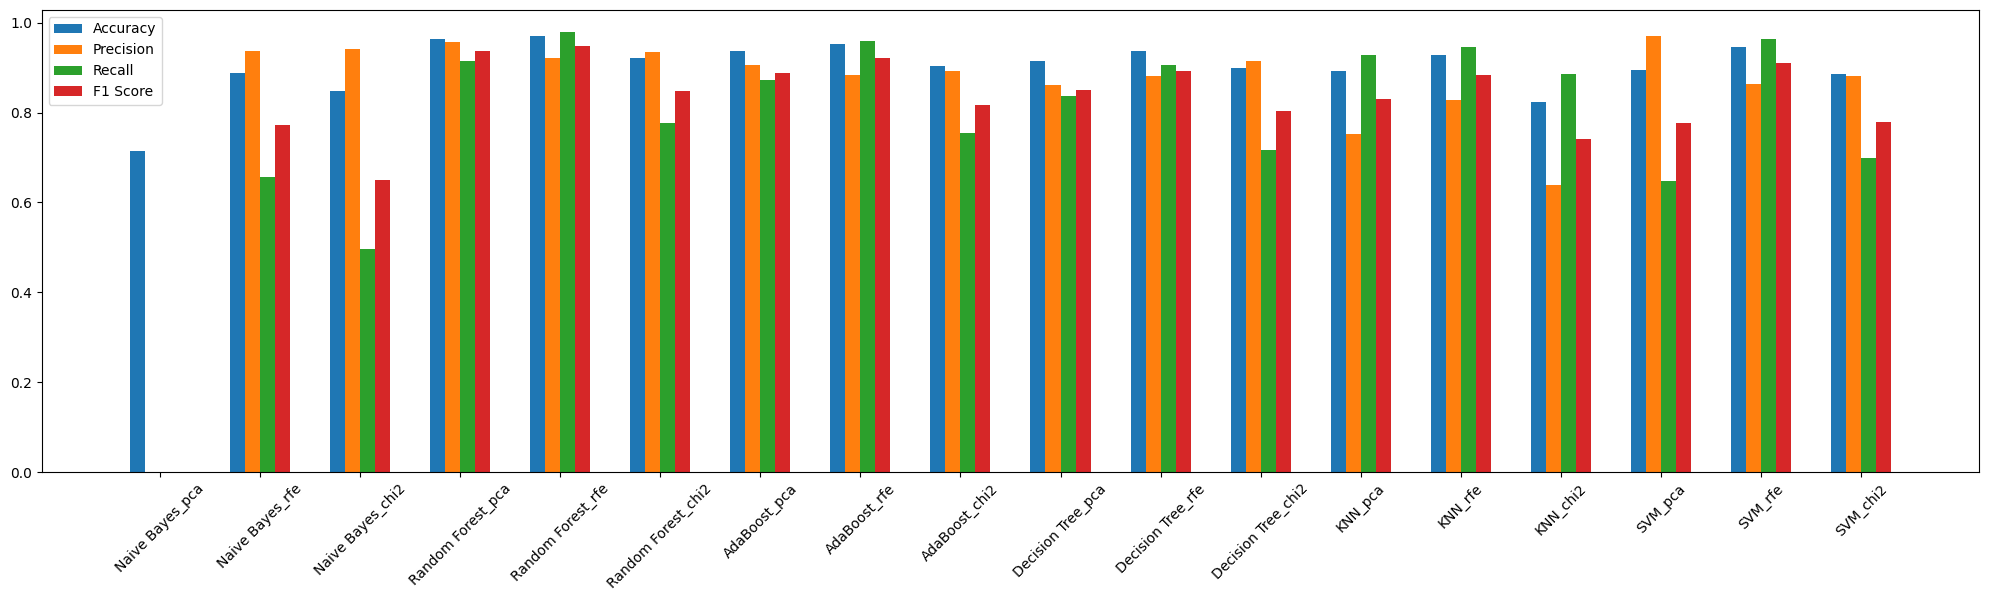

In [ ]:
# extract metrics values
accuracies = [results[model]['accuracy'] for model in results]
precisions = [results[model]['precision'] for model in results]
recalls = [results[model]['recall'] for model in results]
f1_scores = [results[model]['f1_score'] for model in results]

# plot bar chart
bar_width = 0.15
index = np.arange(len(results))
fig = plt.figure(figsize=(25, 6))
plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

plt.xticks(index + bar_width * 1.5, list(results.keys()),rotation=45)
plt.legend()
plt.show()


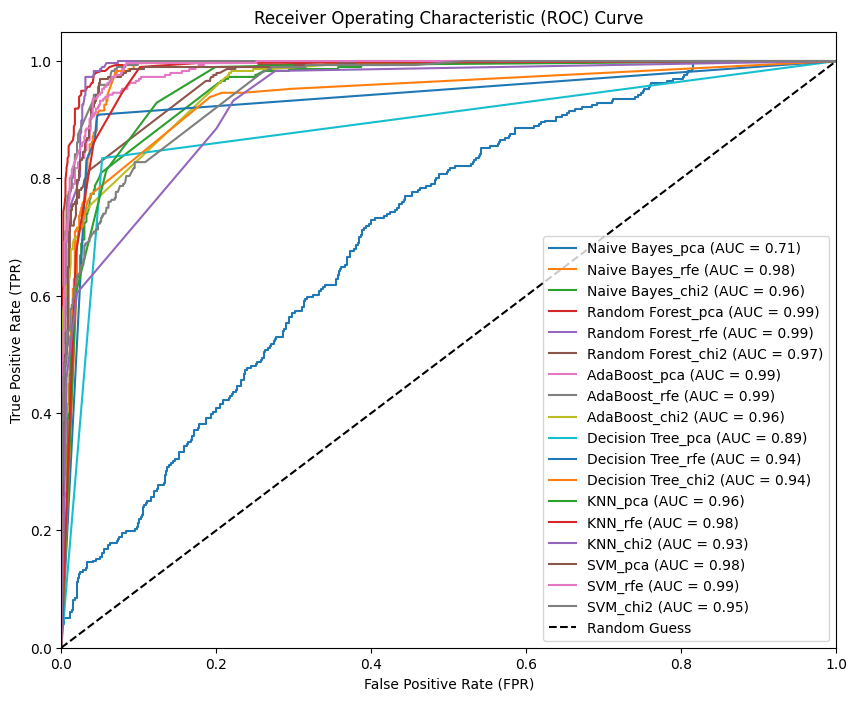

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test = y_test.astype(int)
# loop through the results dictionary to retrieve predicted probabilities
probas_dict = {}
for name, model in models.items():
    # using PCA
    model.fit(X_train_pca, y_train)
    y_pred_pca = model.predict_proba(X_test_pca)[:, 1]
    probas_dict[name + '_pca'] = y_pred_pca

    # using RFE
    model.fit(X_train_rfe, y_train)
    y_pred_rfe = model.predict_proba(X_test_rfe)[:, 1]
    probas_dict[name + '_rfe'] = y_pred_rfe

    # using chi-squared test
    model.fit(X_train_chi2, y_train)
    y_pred_chi2 = model.predict_proba(X_test_chi2)[:, 1]
    probas_dict[name + '_chi2'] = y_pred_chi2

# plot ROC curve
plt.figure(figsize=(10, 8))
for name, probas in probas_dict.items():
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
